# Background 

This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015. 

I will perform a sentiment analysis on Amazon and IMDB to see whether people left positive or negative feedback. 

The data can be found here: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
%matplotlib inline

In [24]:
# Start with amazon review first.
amazon_reviews = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t')

# If you run .head() without doing anything, we will only see two columns, 
# comments and a number ( 0 or 1). 
# lets look only at positive reviews.
amazon_reviews.columns = ['reviews', 'positive']
amazon_reviews['positive'] = (amazon_reviews['positive'] == 1)

print(amazon_reviews.head())

                                             reviews  positive
0                        Good case, Excellent value.      True
1                             Great for the jawbone.      True
2  Tied to charger for conversations lasting more...     False
3                                  The mic is great.      True
4  I have to jiggle the plug to get it to line up...     False


In [3]:
# Lets take a look at the data now and see if I can find any words to use for the keywords. 
print(amazon_reviews.head(50))


                                              reviews  positive
0                         Good case, Excellent value.      True
1                              Great for the jawbone.      True
2   Tied to charger for conversations lasting more...     False
3                                   The mic is great.      True
4   I have to jiggle the plug to get it to line up...     False
5   If you have several dozen or several hundred c...     False
6         If you are Razr owner...you must have this!      True
7                 Needless to say, I wasted my money.     False
8                    What a waste of money and time!.     False
9                     And the sound quality is great.      True
10  He was very impressed when going from the orig...      True
11  If the two were seperated by a mere 5+ ft I st...     False
12                           Very good quality though      True
13  The design is very odd, as the ear "clip" is n...     False
14  Highly recommend for any one who has

In [4]:
keywords = ['good', 'excellent','great', 'nice', 'awesome', 'fantastic',
           'well', 'wonderful', 'ideal', 'quick', 'best', 'fair']

for key in keywords:
    amazon_reviews[str(key)] = amazon_reviews.reviews.str.contains(
        str(key),
        case=False
    )

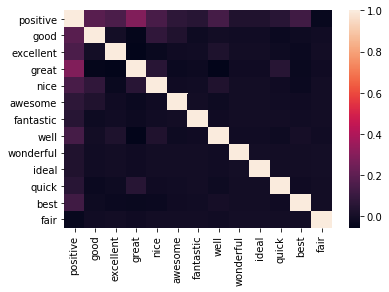

In [5]:
# Time to check if the keywords are correlated; if not, then proceed with the Bernoulli NB
sns.heatmap(amazon_reviews.corr())

None of the keywords have a correlation over .5, it's safe to proceed.

In [6]:
data = amazon_reviews[keywords]
target = amazon_reviews['positive']

In [23]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of positive reviews out of a total {} reviews : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of positive reviews out of a total 747 reviews : 298


In [8]:
# Try this classifier on IMDB.

imdb_reviews = pd.read_csv('imdb_labelled.txt', delimiter='\t')

# Same thing as before, need to add column names to both columns.
imdb_reviews.columns = ['reviews', 'positive']
imdb_reviews['positive'] = (imdb_reviews['positive'] == 1)

In [9]:
print(imdb_reviews.head(50))

                                              reviews  positive
0   Not sure who was more lost - the flat characte...     False
1   Attempting artiness with black & white and cle...     False
2        Very little music or anything to speak of.       False
3   The best scene in the movie was when Gerardo i...      True
4   The rest of the movie lacks art, charm, meanin...     False
5                                 Wasted two hours.       False
6   Saw the movie today and thought it was a good ...      True
7                                A bit predictable.       False
8   Loved the casting of Jimmy Buffet as the scien...      True
9                And those baby owls were adorable.        True
10  The movie showed a lot of Florida at it's best...      True
11  The Songs Were The Best And The Muppets Were S...      True
12                                  It Was So Cool.        True
13  This is a very "right on case" movie that deli...      True
14  It had some average acting from the 

In [10]:
# I would change some of the keywords, but I'm supposed to test how well
# this model works on other datasets. 
keywords = ['good', 'excellent','great', 'nice', 'awesome', 'fantastic',
           'well', 'wonderful', 'ideal', 'quick', 'best', 'fair']

for key in keywords:
    imdb_reviews[str(key)] = imdb_reviews.reviews.str.contains(
        str(key),
        case=False
    )

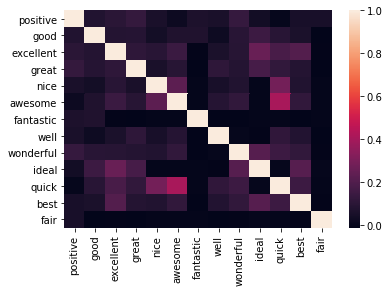

In [11]:
# Time to check if the keywords are correlated; if not, then proceed with the Bernoulli NB
sns.heatmap(imdb_reviews.corr())

Correlation is higher here, but it luckily still hasn't broken .5 so it's still useable.

In [12]:
data = imdb_reviews[keywords]
target = imdb_reviews['positive']

In [13]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of positive reviews out of a total {} reviews : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of positive reviews out of a total 747 reviews : 298


I based my model off of the tutorial. I've used almost exactly the same setup, but I changed up the keywords since the example wanted spam markers and I wanted positive comment markers. I selected the positive comment markers off the top 50 comments and the words that came up with the positive comment.